<a href="https://colab.research.google.com/github/kartikspy/Winter_K_20BCS7357_Kartik/blob/main/Plant_Leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kartikkishore19
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:11<00:00, 248MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [4]:
 len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [6]:
train= train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size=(256,256), batch_size=16)

val= val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", target_size=(256,256), batch_size=16)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [7]:
t_img, label = train.next()

In [8]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

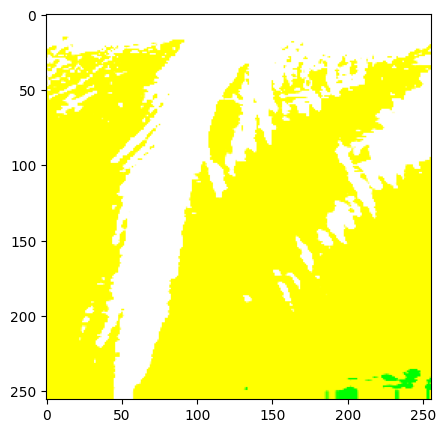

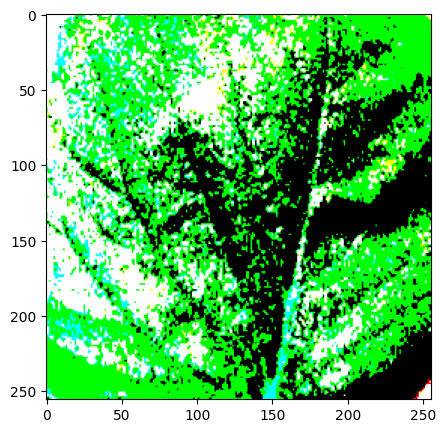

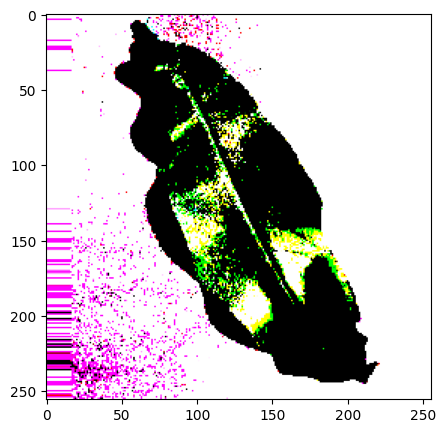

In [9]:
plotImage(t_img[:3],label[:3])

In [10]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras


In [11]:
base_model=VGG19(input_shape = (256,256,3), include_top=False)

80134624/80134624 [==============================] - 0s 0us/step


In [12]:
for layer in base_model.layers:
  layer.trainable=False

In [13]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
X=Flatten()(base_model.output)

X=Dense(units=38, activation='softmax')(X)

#Creating Model
model=Model(base_model.input, X)


In [15]:
from keras.optimizers import Adam
lr = 0.001  # learning rate
optimizer = Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Early Stopping and Model Checkpoints


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es=EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1)

mc = ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy', min_delta=0.01, patience=3, verbose=1, save_best_only=True)

cb=[es, mc]

In [17]:
his=model.fit_generator(train, steps_per_epoch=2393, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=550)

<ipython-input-17-83a07ac5c486>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his=model.fit_generator(train, steps_per_epoch=2393, epochs=50, verbose=1, callbacks=cb, validation_data=val, validation_steps=550)


Epoch 1/50
2393/2393 [==============================] - ETA: 0s - loss: 11.3437 - accuracy: 0.7728
Epoch 1: val_accuracy improved from -inf to 0.91295, saving model to best_model.h5
2393/2393 [==============================] - 761s 314ms/step - loss: 11.3437 - accuracy: 0.7728 - val_loss: 5.6526 - val_accuracy: 0.9130
Epoch 2/50
2393/2393 [==============================] - ETA: 0s - loss: 9.7003 - accuracy: 0.8700
Epoch 2: val_accuracy improved from 0.91295 to 0.92648, saving model to best_model.h5
2393/2393 [==============================] - 690s 288ms/step - loss: 9.7003 - accuracy: 0.8700 - val_loss: 5.9568 - val_accuracy: 0.9265
Epoch 3/50
2393/2393 [==============================] - ETA: 0s - loss: 9.2471 - accuracy: 0.8969
Epoch 3: val_accuracy improved from 0.92648 to 0.93295, saving model to best_model.h5
2393/2393 [==============================] - 713s 298ms/step - loss: 9.2471 - accuracy: 0.8969 - val_loss: 7.0224 - val_accuracy: 0.9330
Epoch 4/50
2393/2393 [================

In [18]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

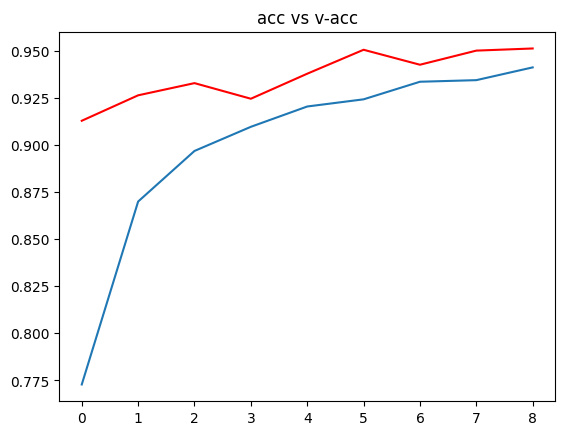

In [19]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

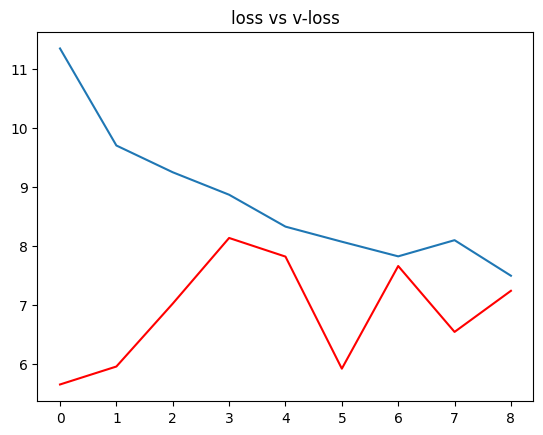

In [20]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [21]:
from keras.models import load_model

model=load_model("/content/best_model.h5")

In [22]:
acc=model.evaluate_generator(val)[1]

print(f"The accuracy of your model is = {acc*100} %")

<ipython-input-22-fa96441625ca>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc=model.evaluate_generator(val)[1]


The accuracy of your model is = 95.49282789230347 %


In [23]:
ref=dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [24]:
def prediction(path):
  img= load_img(path, target_size=(256,256))

  i=img_to_array(img)

  im= preprocess_input(i)
  
  img= np.expand_dims(im, axis=0)

  pred= np.argmax(model.predict(img))

  print(f" the image belong to { ref[pred]}")

In [25]:
path="/content/new-plant-diseases-dataset/test/test/CornCommonRust2.JPG"

prediction(path)

1/1 [==============================] - 1s 749ms/step
 the image belong to Corn_(maize)___Common_rust_
